# DeepShibaの開発再開にあたって現状を確認しようと思う
> 開発中のフレームワークの現状を確認します

- toc: true 
- badges: true
- comments: true
- categories: [MachineLearning, JuliaLang, DeepLearning, DeepShiba]
- image: images/chart-preview.png


## DeepShibaとは
もともとゼロから作るDeepLearning3をJuliaに移植しよう！というところから始まった自作のDLフレームワークです。


現状は計算グラフの構築 + 自動微分etc.....というところまでで、まだ本丸(NNに関連する機能)は未実装です(え？)


最近は僕がkaggleをはじめとした機械学習コンペにハマってしまった影響で開発が滞っていたのですが、再開しようかなぁという気持ちになったので、現状を確認していこうと思います。

## 最初の最初

In [ ]:
using DeepShiba

DeepShibaは、`ShibaObject.Variable`のデータを流すことで、通常のJuliaの関数を高速に微分することができます。

In [ ]:
f(x) = 3x^2 + 2x + 1

この関数を微分します。
$$
f(x) = 3x^2 + 2x + 1
$$
なので、
$$
f'(x) = 6x + 2
$$
です。実際に計算させてみます。


`variable`を使うことで`ShibaObject.Variable`を作ります。これは演算時に自動で計算グラフを構築します。

In [5]:
x = variable(2, name="x")
x

{DeepShiba.ShibaObject.Variable}:
x :
data: 2
User-Defined


In [6]:
y = f(x)
y

{DeepShiba.ShibaObject.Variable}:
data: 17
creator: DeepShiba.Add


`ShibaObject.Variable`との演算は, `ShibaObject.Variable`を返します。したがって、yも`ShibaObject.Variable`です。

In [8]:
backward!(y)
x

{DeepShiba.ShibaObject.Variable}:
x :
data: 2
grad: 14
User-Defined


`backward!(y)`を使用することで、逆伝播が行われ、自動的にxの勾配が求められます。

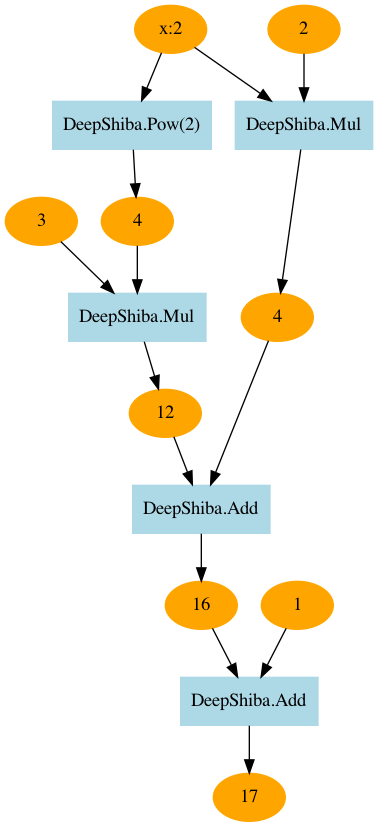

In [9]:
plot(y)

#### Example
自動微分を利用して勾配降下法を実装してみます。

In [75]:
f(x) = 5x^2 + (0.2 * cos(x * 10))

x = variable(2.0, name="x")
lr = 1e-3
iters = 10000
log_interval = 1000

for i in 1:iters
    ((i - 1) % log_interval == 0) && (println("$i: $(x.data)"))
    y = f(x)
    cleargrad!(x)
    backward!(y)
    x.data -= lr * x.grad.data
end

1: 2.0
1001: 0.18954951933991088
2001: 0.18954942670340436
3001: 0.18954942670339894
4001: 0.18954942670339894
5001: 0.18954942670339894
6001: 0.18954942670339894
7001: 0.18954942670339894
8001: 0.18954942670339894
9001: 0.18954942670339894


In [76]:
using Plots; plotly()

Plots.PlotlyBackend()

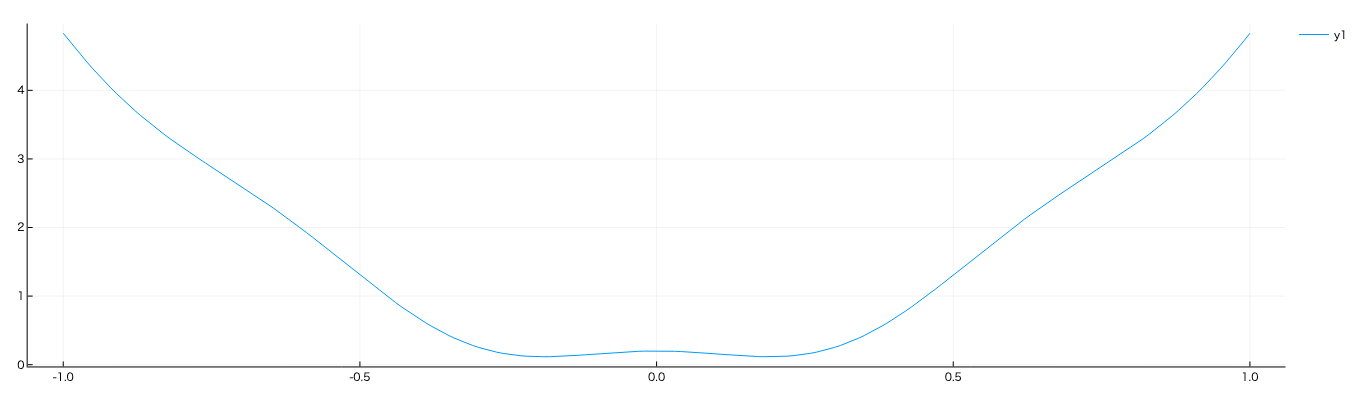

In [77]:
Plots.plot(-1:0.01:1, f.(-1:0.01:1))

### 今後の予定
そもそもDeepShibaの開発は、broadcast周りへの対応が詰まって若干モチベが下がったとことから止まりました。

なのでまず未完成のbroadcastの記事を完成させて、開発を再開していきたいと思います(いつまで書いてるんですか????????????)